# generate oriented bounding box

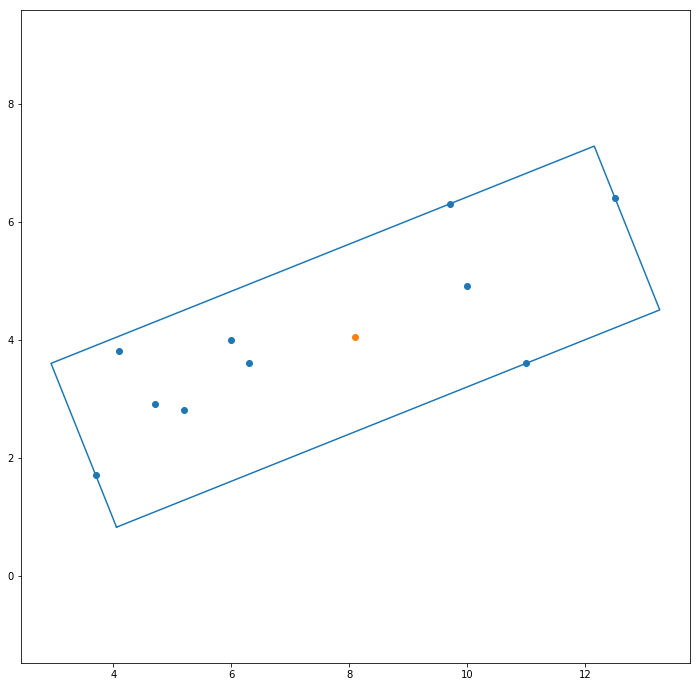

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

a  = np.array([(3.7, 1.7), (4.1, 3.8), (4.7, 2.9), (5.2, 2.8), (6.0,4.0), (6.3, 3.6), (9.7, 6.3), (10.0, 4.9), (11.0, 3.6), (12.5, 6.4)])
ca = np.cov(a,y = None,rowvar = 0,bias = 1)

v, vect = np.linalg.eig(ca)
tvect = np.transpose(vect)



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.scatter(a[:,0],a[:,1])

#use the inverse of the eigenvectors as a rotation matrix and
#rotate the points so they align with the x and y axes
ar = np.dot(a,np.linalg.inv(tvect))

# get the minimum and maximum x and y 
mina = np.min(ar,axis=0)
maxa = np.max(ar,axis=0)
diff = (maxa - mina)*0.5

# the center is just half way between the min and max xy
center = mina + diff

#get the 4 corners by subtracting and adding half the bounding boxes height and width to the center
corners = np.array([center+[-diff[0],-diff[1]],center+[diff[0],-diff[1]],center+[diff[0],diff[1]],center+[-diff[0],diff[1]],center+[-diff[0],-diff[1]]])

#use the the eigenvectors as a rotation matrix and
#rotate the corners and the centerback
corners = np.dot(corners,tvect)
center = np.dot(center,tvect)

ax.scatter([center[0]],[center[1]])    
ax.plot(corners[:,0],corners[:,1],'-')

plt.axis('equal')
plt.show()


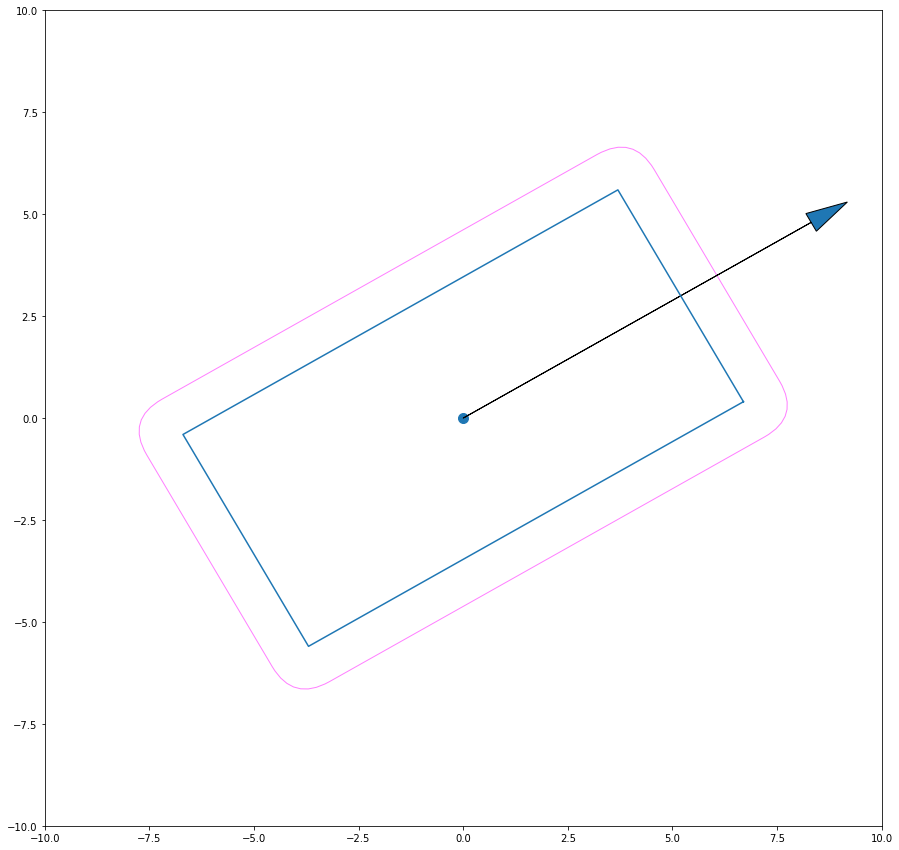

In [33]:
import math
from matplotlib.patches import FancyBboxPatch
import matplotlib as mpl

class obb:
    def __init__(self, center_x, center_y, width, length, heading):
        self.center_x = center_x
        self.center_y = center_y
        self.width = width
        self.length = length
        self.heading = heading
        self.min_x = float("inf")
        self.max_x = -float("inf")
        self.min_y = float("inf")
        self.max_y = -float("inf")
        self.corners = []
        
        self.init_corners()
        
    def init_corners(self):
        dx1 = math.cos(self.heading) * self.length / 2
        dy1 = math.sin(self.heading) * self.length / 2
        dx2 = math.sin(self.heading) * self.width / 2
        dy2 = -math.cos(self.heading) * self.width / 2
        self.corners.clear()
        self.corners.append([self.center_x + dx1 + dx2, self.center_y + dy1 + dy2])
        self.corners.append([self.center_x + dx1 - dx2, self.center_y + dy1 - dy2])
        self.corners.append([self.center_x - dx1 - dx2, self.center_y - dy1 - dy2])
        self.corners.append([self.center_x - dx1 + dx2, self.center_y - dy1 + dy2])
        
        for corner in self.corners:
            self.max_x = max(corner[0], self.max_x)
            self.min_x = min(corner[0], self.min_x)
            self.max_y = max(corner[1], self.max_y)
            self.min_y = min(corner[1], self.min_y)
            
    def draw(self):
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot(111)

        self.corners.append(self.corners[0])
        self.corners = np.array(self.corners)
        
        ax.scatter([self.center_x], [self.center_y], s=100)
        ax.plot(self.corners[:,0], self.corners[:,1], '-')

        round_obb = FancyBboxPatch((self.center_x-self.length/2, self.center_y-self.width/2),
                                 self.length, self.width,
                                 boxstyle="round,pad=1",
                                 fill=False,
                                 #fc=(1., .8, 1.),
                                 ec=(1., 0.5, 1.))
             
        # t2 = mpl.transforms.Affine2D().rotate(self.heading) + ax.transData
        t2 = mpl.transforms.Affine2D().rotate_around(self.center_x, self.center_y, self.heading) + ax.transData
        round_obb.set_transform(t2)

        ax.add_patch(round_obb)
        
        arrow_length = self.length * 0.8
        
        ax.arrow(self.center_x, self.center_y, 
                  arrow_length * math.cos(self.heading), arrow_length * math.sin(self.heading), 
                  head_width=0.5, head_length=1)
        
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        #plt.axis('equal')
        plt.draw()
        plt.show()
        
        

# test_obb = obb(0, 0, 6, 12, 0)
test_obb = obb(0, 0, 6, 12, math.pi/6)
test_obb.draw()

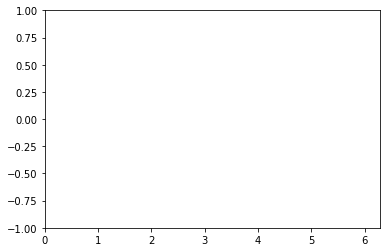

In [32]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [ ]:
footprints = []
footprints.append([0, 0, 0, 0, 0])
footprints.append([0, 0, 0, 0, 0])